# 3er Examen Parcial
Joel Fayam Rivera Peña 2076323
Estadística Aplicada Gpo.-42

In [68]:
#Librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
#Datos
datos=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')
datos.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


## 1
Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada

In [70]:
#Tipos de variables
datos.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [71]:
#Variable fecha en index con frecuencia asignada
datos['mes']=pd.to_datetime(datos['mes'],format='%Y/%m')
datos=datos.set_index('mes')
datos=datos.asfreq('MS')

In [72]:
datos.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [73]:
datos.head()

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0
1995-03-01,3103.0,3990.0
1995-04-01,3491.0,3321.0
1995-05-01,3109.0,3777.0


In [74]:
#Missing values
datos.isnull().sum()

miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

## 2. Análisis exploratorio
Análisis  exploratorio.  Utilizando  código  de  Python  genera  un  print() para  cada una de la siguiente información: <br>
a)Rango de fechas <br>
b)Número de observaciones <br>
c)Valor mínimo y valor máximo del número de pasajeros <br>

In [75]:
#Rango de fechas
print(f'Contamos con información desde {datos.index[0]} hasta {datos.index[-1]}')

Contamos con información desde 1995-01-01 00:00:00 hasta 2023-08-01 00:00:00


In [76]:
#Número de observaciones
print(f'En nuestro dataframe contamos con un total de {datos["miles de pasajeros"].count()} observaciones')

En nuestro dataframe contamos con un total de 344 observaciones


In [77]:
#Valor mínimo y valor máximo del número de pasajeros
print(f'En nuestra base de datos, para la información del número de pasajeros contamos con mínimo de {datos["miles de pasajeros"].min()} miles de pasajeros y un máximo de {datos["miles de pasajeros"].max()} miles de pasajeros.')

En nuestra base de datos, para la información del número de pasajeros contamos con mínimo de 2397.0 miles de pasajeros y un máximo de 17534.523 miles de pasajeros.


## 3.Gráficas
Grafica lo siguiente: <br>
a) La serie de miles de pasajeros <br>
b) Una media móvil centrada a 6 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.

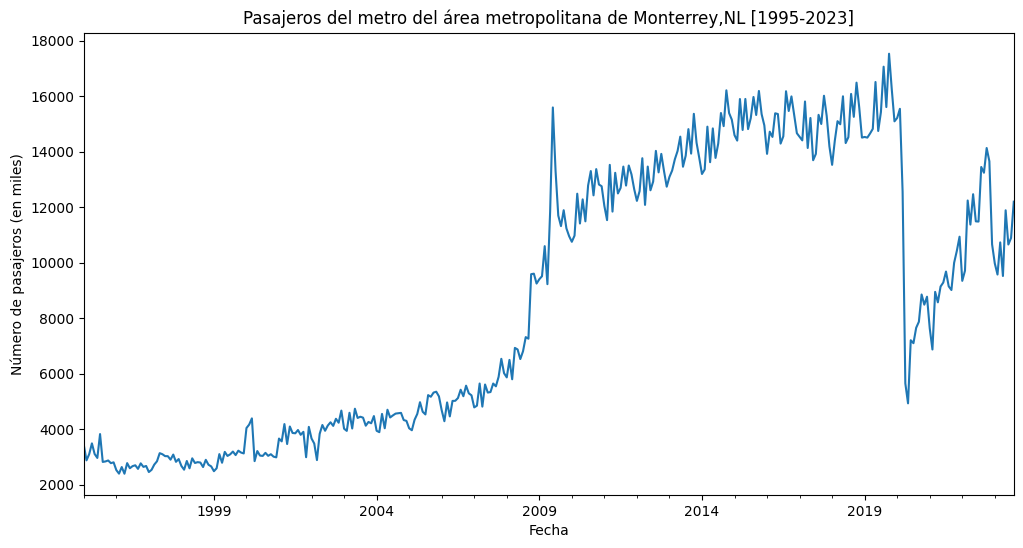

In [78]:
#Serie de miles de pasajeros
datos['miles de pasajeros'].plot(figsize=(12,6))
plt.title('Pasajeros del metro del área metropolitana de Monterrey,NL [1995-2023]')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros (en miles)')
plt.show()

In [79]:
datos['media movil']=datos['miles de pasajeros'].rolling(6,center=True).mean()

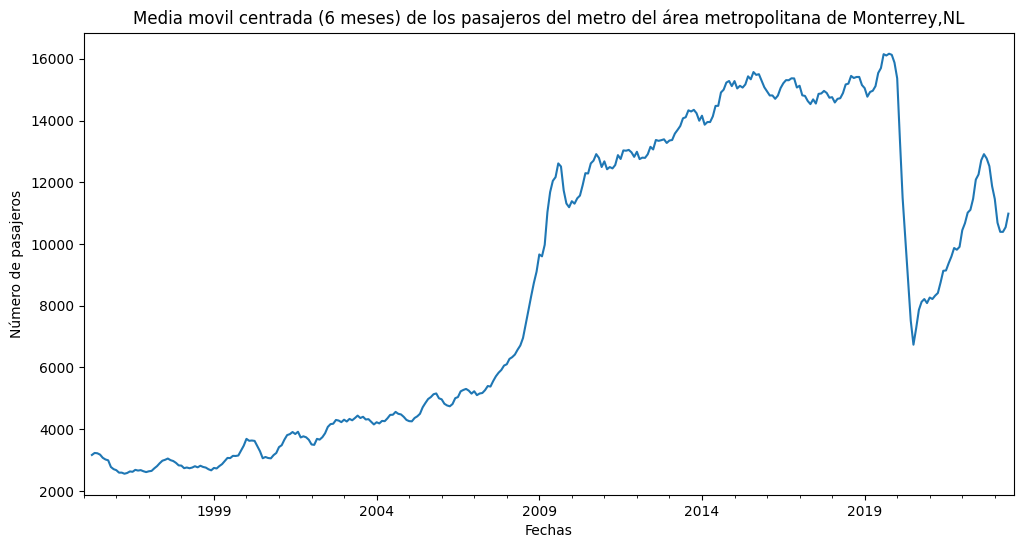

In [80]:
datos['media movil'].plot(figsize=(12,6))
plt.title('Media movil centrada (6 meses) de los pasajeros del metro del área metropolitana de Monterrey,NL')
plt.xlabel('Fechas')
plt.ylabel('Número de pasajeros')
plt.show()

Observamos que a lo largo de los años ha existido una tendencia creciente durante la mayoría de la serie hasta mediados del 2019 en donde debido a la pandemia del Covid-19 observamos una nueva tendencia decreciente hasta mediados del 2020 el cual es el donde se empieza a regresar con una mayor frecuencia el transporte público, razón por la cual observamos que a partir de ese periodo vuelve a surgir una tendencia creciente hasta la actualidad.

Por otro lado, observamos unos ligeros ciclos en distintos periodos de tiempo que reflejan ligeros comportamiento a largo plazo. Por ejemplo, desde 1999 hasta el 2007 han habido constantes ciclos de subidas y caidas entre los inicios y finales de año que arrojan valores cada vez más altos que de cierta forma mantienen el pronóstico de la tendencia a largo plazo. Así como también hay ligeros ciclos decrecientes en algunos puntos como lo son mediados del 2009 o el de finales del 2022 que coincide con las fechas de la suspensión de 6 estaciones de la linea 2.



## 4. Modelo ETS

El director  de  Metrorrey  planea  hacer  mantenimiento  a  las  estaciones  y  los vagones,  pero  no  sabe  la  fecha  adecuada  para  hacerlo.  Utiliza  el  modelo  ETS para  obtener  el  componente  estacional  de  la  serie  y  señala  el  mes  o  meses adecuados para dar mantenimiento

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
ets=seasonal_decompose(datos['miles de pasajeros'],model='mult')
plt.rcParams['figure.figsize']=(10,6)

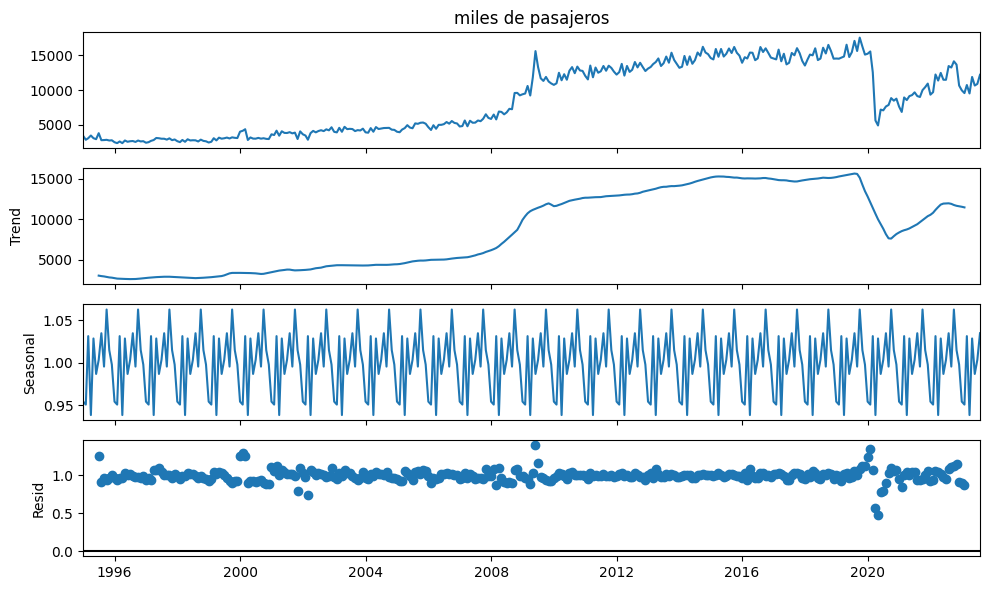

In [83]:
ets.plot();

In [84]:
seasonal=ets.seasonal.head(12)
seasonal=pd.DataFrame(seasonal)

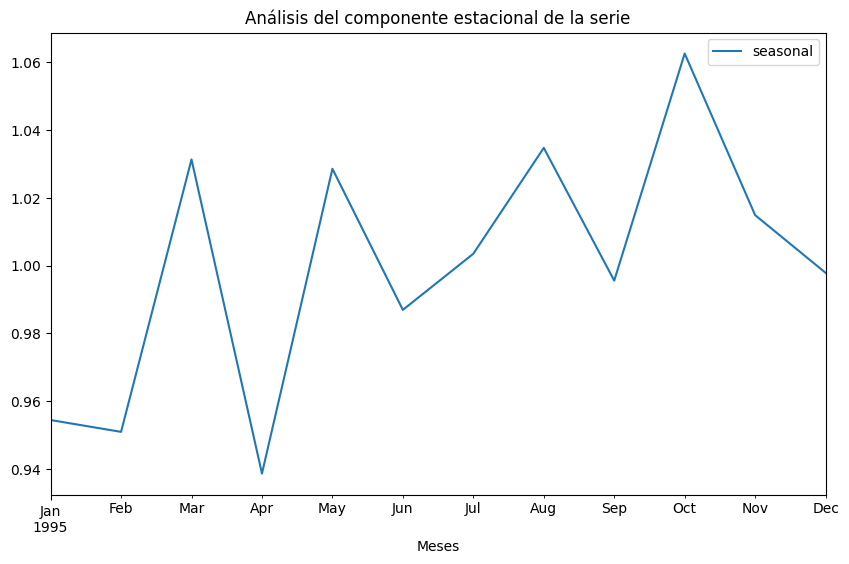

In [85]:
seasonal.plot()
plt.title('Análisis del componente estacional de la serie')
plt.xlabel('Meses')
plt.show()

Analizando el componente estacional de la serie, observamos que hay periodos donde decrece la cantidad de pasajeros los cuales podrían ser útiles para realizar el mantenimiento. Un momento interesante para realizarlo podría ser de noviembre a febrero (que coincide con las mayoría de vacaciones de invierno) o en su defecto en abril que es cuando está el menor uso del transporte.

## 5. Modelo Holt-Winters
El  director  de  Metrorrey  quiere  saber  los  ingresos  por  pasaje  y  el  número  de pasajeros  los  siguientes  5  meses. Utiliza  el  método  de  Holt-Winters  para pronosticar  el  número  de  pasajeros los  próximos  5  meses,  cada  pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos

In [86]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [87]:
holt_winter=ExponentialSmoothing(datos['miles de pasajeros'],trend='mul',seasonal='add',seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [88]:
pronostico=holt_winter.forecast(5)

In [89]:
ingresos=pronostico*7.1

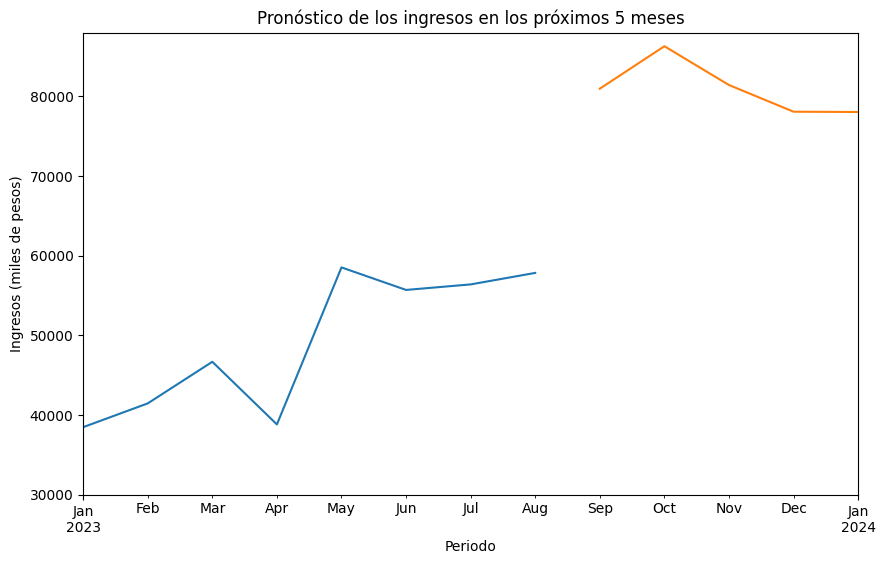

In [90]:
datos['ingresos (miles de pesos)'].plot()
ingresos.plot()
plt.title('Pronóstico de los ingresos en los próximos 5 meses')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xlim('2023-01-01','2024-01-01')
plt.ylim(30000,88000)
plt.show()

Observamos un desfase con los ingresos debido a la diferencia del precio de los boletos entre los años.

In [91]:
holt=pd.DataFrame({'Pronóstico':pronostico,
                  'Ingresos':ingresos})

In [92]:
holt

,Pronóstico,Ingresos
2023-09-01,11401.085671,80947.708266
2023-10-01,12152.018152,86279.328881
2023-11-01,11465.794850,81407.143438
2023-12-01,10994.202079,78058.834763
2024-01-01,10989.149794,78022.963536


## ARIMA
Realiza   un   pronósticode   los   miles   de   pasajeroscon   el   modelo   ARIMA cumpliendo los siguientes pasos

In [93]:
pip install pmdarima

In [94]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [95]:
#Realiza una prueba de raíz unitaria a la serie original
prueba=adfuller(datos['miles de pasajeros'])
pvalue=prueba[1]
pvalue

0.5757606962292787

Dado que contamos con un valor de pvalue > 0.05, no rechazamos Ho y decimos que la serie no es estacionaria.

In [96]:
#En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie sea estacionaria
datos['1ras_diff']=datos['miles de pasajeros'].diff()

In [97]:
prueba2=adfuller(datos['1ras_diff'].dropna())
pvalue2=prueba2[1]
pvalue2

0.0003155023669912257

Dado que contamos con un valor de value < 0.05, rechazamos Ho y decimos que las primeras diferencias son una serie estacionaria.

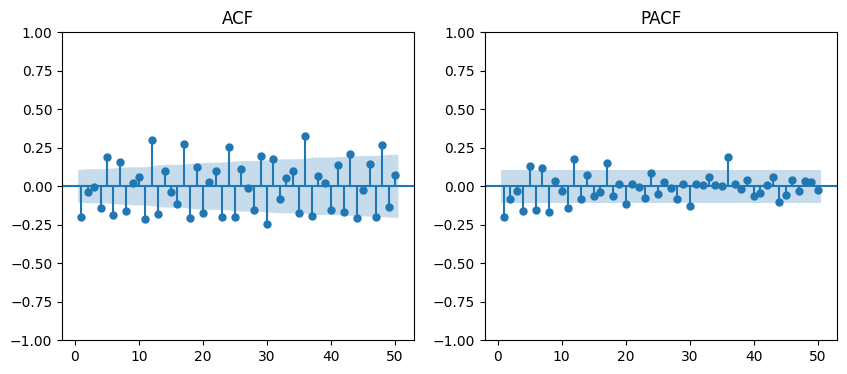

In [98]:
#Realiza  las  graficas  de  autocorrelación  de  la  serie  estacionaria  para verificar si la serie tiene o no un componente estacional
ig,ax=plt.subplots(1,2,figsize=(10,4))
## 1
plot_acf(datos['1ras_diff'].dropna(),zero=False,lags=50,ax=ax[0],title='ACF')
ax[0].set_ylim(-1,1)
## 2
plot_pacf(datos['1ras_diff'].dropna(),zero=False,lags=50,ax=ax[1],title='PACF')
ax[1].set_ylim(-1,1)
plt.show()

Observamos que la serie si tiene componente estacional.

In [99]:
#Utiliza auto_arimapara encontrar el orden del modelo arima, dando el parámetro information_criterionprueba y muestra el resultado, con aic, bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic
pm.auto_arima(datos['miles de pasajeros'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              seasonal=True,
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,
              information_criterion='aic')

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [100]:
pm.auto_arima(datos['miles de pasajeros'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              seasonal=True,
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,
              information_criterion='bic')

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [101]:
pm.auto_arima(datos['miles de pasajeros'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              seasonal=True,
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,
              information_criterion='hqic')

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [102]:
pm.auto_arima(datos['miles de pasajeros'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              seasonal=True,
              start_P=1,
              start_Q=1,
              max_P=12,
              max_Q=12,
              information_criterion='oob')

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Elegiremos el criterio oob

In [103]:
#Con  el  orden  del  modelo  arima  obtenido  estima  el  modelo  arima
modelo_arima=ARIMA(datos['miles de pasajeros'],order=(1,1,3),seasonal_order=(1,0,1,12))
resultados=modelo_arima.fit()
print(resultados.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.720
Date:                            Fri, 03 Nov 2023   AIC                           5559.440
Time:                                    18:05:32   BIC                           5586.304
Sample:                                01-01-1995   HQIC                          5570.141
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9508      0.039    -24.502      0.000      -1.027      -0.875
ma.L1          0.9153      0.052   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [104]:
datos['ARIMA']=resultados.predict()
datos['ARIMA'][0]=datos['miles de pasajeros'][0]

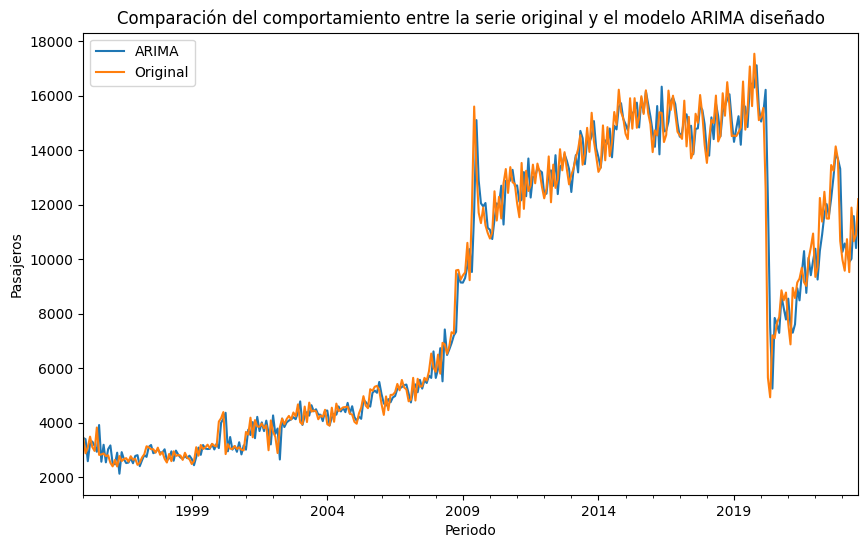

In [105]:
datos['ARIMA'].plot(label='ARIMA')
datos['miles de pasajeros'].plot(label='Original')
plt.title('Comparación del comportamiento entre la serie original y el modelo ARIMA diseñado')
plt.xlabel('Periodo')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

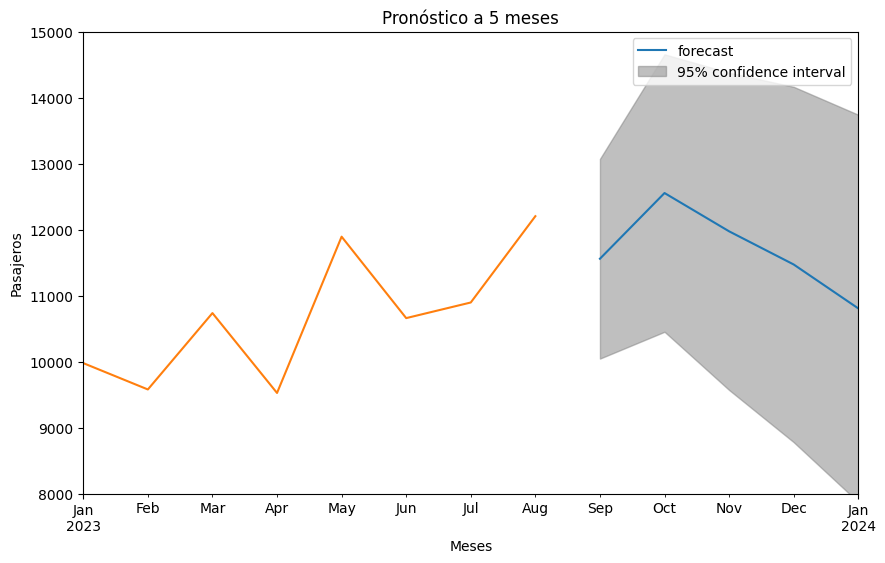

In [106]:
#Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021
plot_predict(resultados,start='2023-09-01',end='2024-01-01')
datos['miles de pasajeros'].plot()
plt.title('Pronóstico a 5 meses')
plt.xlabel('Meses')
plt.ylabel('Pasajeros')
plt.xlim('2023-01-01','2024-01-01')
plt.ylim(8000,15000)
plt.show()


In [107]:
#Realiza  el  pronostico  a  5  meses  con  los  intervalos  de  confianza
inicio='2023-09-01'
fin='2024-01-01'
pronostico=resultados.get_forecast(steps=5)
pronostico_promedio=pronostico.predicted_mean
pronostico_lim=pronostico.conf_int()
pronostico_valor=pronostico_promedio[inicio:fin]
pronostico_intervalos=pronostico_lim.loc[inicio:fin]

In [108]:
pro_datos=pd.DataFrame({'Pronóstico': pronostico_valor,
                        'Limite inferior': pronostico_intervalos.iloc[:,0],
                        'Limite superior': pronostico_intervalos.iloc[:,1]})

In [109]:
#Calcula los ingresos y el intervalo de los ingreso multiplicando por $7.1
pro_datos['Ingresos pronosticados']=pro_datos['Pronóstico']*7.1
pro_datos['Lim inferior ingresos']=pro_datos['Limite inferior']*7.1
pro_datos['Lim superior ingresos']=pro_datos['Limite superior']*7.1

In [110]:
pro_datos

,Pronóstico,Limite inferior,Limite superior,Ingresos pronosticados,Lim inferior ingresos,Lim superior ingresos
2023-09-01,11557.311635,10044.403686,13070.219584,82056.912609,71315.266167,92798.559050
2023-10-01,12552.886457,10450.941448,14654.831466,89125.493847,74201.684282,104049.303412
2023-11-01,11972.664462,9568.857728,14376.471196,85005.917681,67938.889869,102072.945493
2023-12-01,11470.192543,8778.266259,14162.118827,81438.367055,62325.690439,100551.043671
2024-01-01,10804.637632,7870.050944,13739.224321,76712.927190,55877.361700,97548.492680
